## Standard Boilerplate Commands

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [49]:
from fastai.vision import *
from fastai.metrics import error_rate,fbeta
import pandas as pd

In [105]:
bs = 32 #Batchsize

In [8]:
path = Path("/home/jupyter/tutorials/data/HoneyBees")

In [9]:
path.ls()

[PosixPath('/home/jupyter/tutorials/data/HoneyBees/bee_imgs'),
 PosixPath('/home/jupyter/tutorials/data/HoneyBees/bee_data.csv'),
 PosixPath('/home/jupyter/tutorials/data/HoneyBees/bee_imgs.zip')]

In [10]:
path_img = path/'bee_imgs' #Setting the path for all the images

## Creating Label file

In [155]:
df = pd.read_csv(path/'bee_data.csv') #Checking the labels file

In [156]:
df.health.value_counts()

healthy                       3384
few varrao, hive beetles       579
Varroa, Small Hive Beetles     472
ant problems                   457
hive being robbed              251
missing queen                   29
Name: health, dtype: int64

In [157]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [158]:
df['file'] = "bee_imgs"+"/"+df.file #Creating file path for every image

In [160]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,bee_imgs/041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,bee_imgs/041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,bee_imgs/041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,bee_imgs/041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,bee_imgs/041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [39]:
df.to_csv(path/"labels.csv",index=False) #Writing the new labels file with file path

In [68]:
import numpy as np

In [69]:
np.random.seed(2)

## Creating Data Bunch

The health labels is the 7th column in our labels dataset

In [127]:
data = ImageDataBunch.from_csv(path,bs=bs,
                               label_col = 6,ds_tfms=get_transforms(), size=112)\
.normalize(imagenet_stats)

**Checking few images along with their labels**

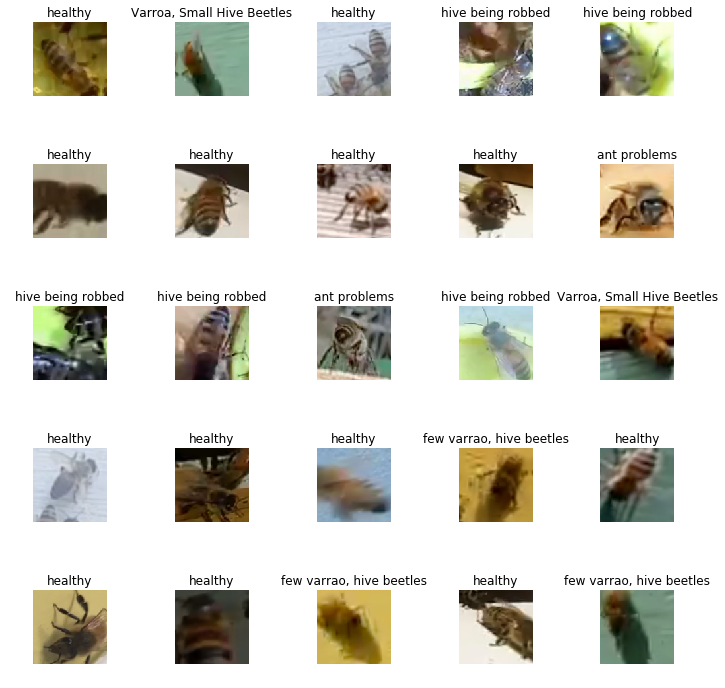

In [141]:
data.show_batch(rows = 5,figsize = (10,10))

In [129]:
data.classes

['Varroa, Small Hive Beetles',
 'ant problems',
 'few varrao, hive beetles',
 'healthy',
 'hive being robbed',
 'missing queen']

## Creating and Fitting the learner

In [130]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [131]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.827302,0.295460,0.109284
2,0.364038,0.193303,0.080271
3,0.284498,0.158170,0.069632
4,0.220445,0.144543,0.056093


In [132]:
learn.save("bee_model_3",return_path=True)

PosixPath('/home/jupyter/tutorials/data/HoneyBees/models/bee_model_3.pth')

## Performance of the Model on Validation dataset

In [133]:
interp = ClassificationInterpretation.from_learner(learn)

In [139]:
from sklearn.metrics import classification_report

**Mapping of class labels to the numbers**

In [140]:
interp.data.c2i

{'Varroa, Small Hive Beetles': 0,
 'ant problems': 1,
 'few varrao, hive beetles': 2,
 'healthy': 3,
 'hive being robbed': 4,
 'missing queen': 5}

In [161]:
print(classification_report(interp.y_true,interp.pred_class,target_names=interp.data.c2i))

                            precision    recall  f1-score   support

Varroa, Small Hive Beetles       0.80      0.81      0.80       104
              ant problems       0.99      1.00      0.99        95
  few varrao, hive beetles       0.83      0.78      0.80       115
                   healthy       0.98      1.00      0.99       661
         hive being robbed       0.92      0.87      0.90        54
             missing queen       0.50      0.40      0.44         5

                 micro avg       0.94      0.94      0.94      1034
                 macro avg       0.84      0.81      0.82      1034
              weighted avg       0.94      0.94      0.94      1034



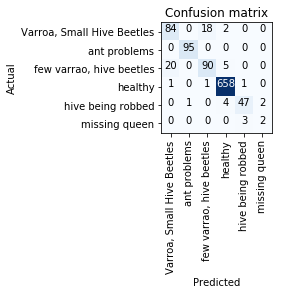

In [162]:
interp.plot_confusion_matrix()

**Few images where the model performed the best**

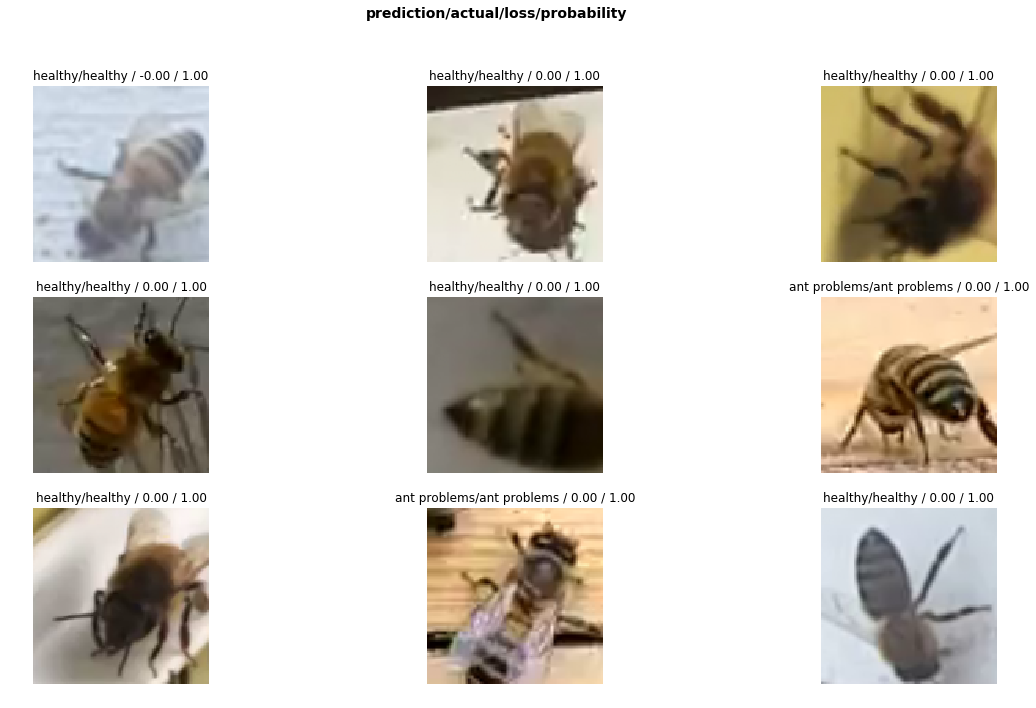

In [166]:
interp.plot_top_losses(9,figsize=(20,11),largest=False)

**Few Images where the model performed the worst**

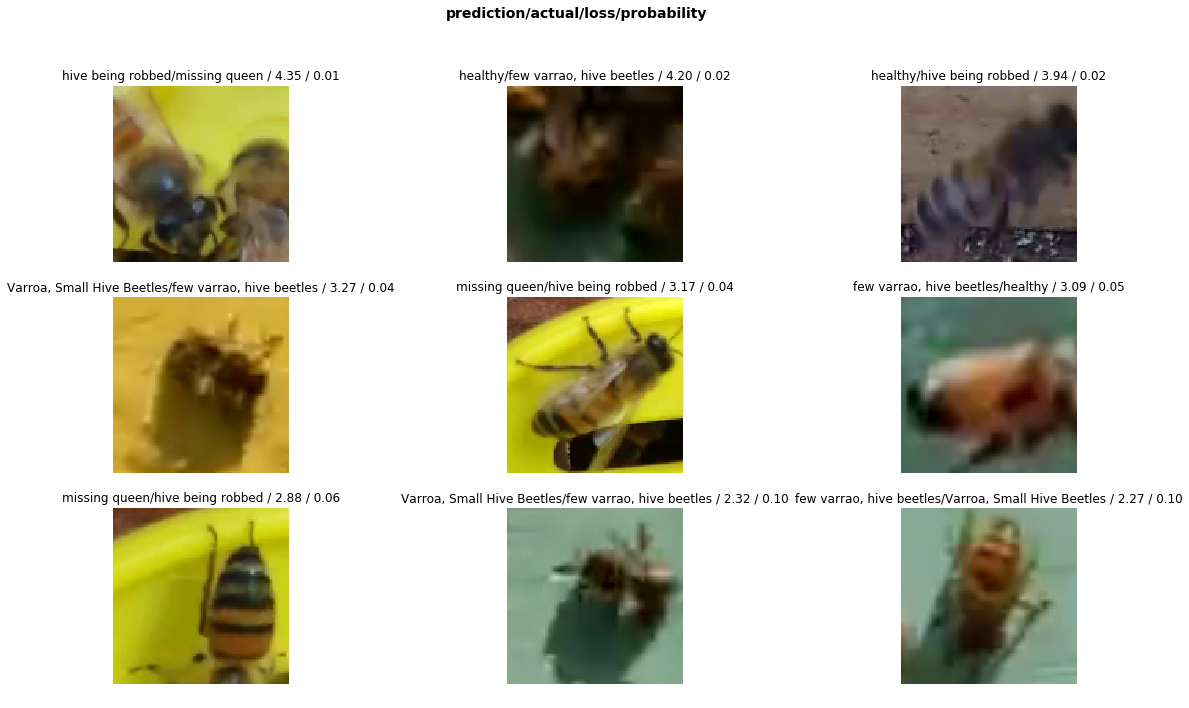

In [167]:
interp.plot_top_losses(9,figsize=(20,11),largest=True)